In [608]:
l = float(input("Enter the wavelength: "))

Enter the wavelength: 2.3


In [609]:
nxsq = 2.4542 + 0.0113 / (l**2 - 0.0114) - 0.0139 * l**2
nysq = 2.5390 + 0.0128 / (l**2 - 0.0119) - 0.0185 * l**2
nzsq = 2.5865 + 0.0131 / (l**2 - 0.0122) - 0.0186 * l**2

nx2wsq = 2.4542 + 0.0113 / ((l/2)**2 - 0.0114) - 0.0139 * (l/2)**2
ny2wsq = 2.5390 + 0.0128 / ((l/2)**2 - 0.0119) - 0.0185 * (l/2)**2
nz2wsq = 2.5865 + 0.0131 / ((l/2)**2 - 0.0122) - 0.0186 * (l/2)**2

In [610]:
print(nxsq, nysq, nzsq)
print(nx2wsq, ny2wsq, nz2wsq)

2.3828097191300723 2.443560115098236 2.4905880948122325
2.4444359671077724 2.5243002691515337 2.571899210447989


In [611]:
import numpy as np
from scipy.optimize import minimize

In [612]:
import matplotlib.pyplot as plt

In [318]:
def objective(x):
    phi = x[0] 

    kx = np.sin(1/2*np.pi) * np.cos(phi)
    ky = np.sin(1/2*np.pi) * np.sin (phi)
    kz = np.cos(1/2*np.pi)
    
    a1 = nxsq**(-1)
    b1 = nysq**(-1)
    c1 = nzsq**(-1)

    a2 = nx2wsq**(-1)
    b2 = ny2wsq**(-1)
    c2 = nz2wsq**(-1)

    B1 = (-(kx**2)*(b1+c1) - (ky**2)*(a1+c1) - (kz**2)*(a1+b1))
    C1 = (kx**2)*b1*c1 + (ky**2)*a1*c1 + (kz**2)*a1*b1

    B2 = (-(kx**2)*(b2+c2) - (ky**2)*(a2+c2) - (kz**2)*(a2+b2))
    C2 = (kx**2)*b2*c2 + (ky**2)*a2*c2 + (kz**2)*a2*b2

    eq1 = np.sqrt(2)/np.sqrt(-B1 - np.sqrt(B1**2 - 4*C1))
    eq2 = np.sqrt(2)/np.sqrt(-B2 + np.sqrt(B2**2 - 4*C2))
    
    # this needs to be absolute value of the difference
    return abs(eq1 - eq2)

In [319]:
bounds_phi = (0*np.pi/180, 90*np.pi/180)
bounds = [bounds_phi]
phi = 20*np.pi/180

In [320]:
result = minimize(objective, phi, method = 'SLSQP', bounds = bounds)
print(result)

     fun: 0.00041858255894977603
     jac: array([-1.02818012e-06])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.])


In [321]:
print(result.x *180/np.pi)

[0.]


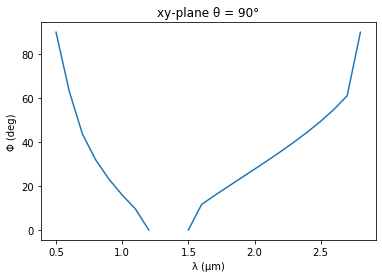

In [312]:
x = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8]
y = [90,63.08,43.6,31.85,23.08,15.89,9.55,0,-np.inf,0,11.59,15.74,19.75,23.7,27.66,31.67,35.78,40.07,44.59,49.47,54.87,61.11,90]
plt.plot(x,y)
plt.xlabel('λ (μm)')
plt.ylabel('Φ (deg)')
plt.title('xy-plane θ = 90°')
plt.show()

In [613]:
def objective(x):
    theta = x[0] 
    
    kx = np.sin(theta) * np.cos(0)
    ky = np.sin(theta) * np.sin(0)
    kz = np.cos(theta)
    
    a1 = nxsq**(-1)
    b1 = nysq**(-1)
    c1 = nzsq**(-1)

    a2 = nx2wsq**(-1)
    b2 = ny2wsq**(-1)
    c2 = nz2wsq**(-1)

    B1 = (-(kx**2)*(b1+c1) - (ky**2)*(a1+c1) - (kz**2)*(a1+b1))
    C1 = (kx**2)*b1*c1 + (ky**2)*a1*c1 + (kz**2)*a1*b1

    B2 = (-(kx**2)*(b2+c2) - (ky**2)*(a2+c2) - (kz**2)*(a2+b2))
    C2 = (kx**2)*b2*c2 + (ky**2)*a2*c2 + (kz**2)*a2*b2

    eq1 = np.sqrt(2)/np.sqrt(-B1 - np.sqrt(B1**2 - 4*C1))
    eq2 = np.sqrt(2)/np.sqrt(-B2 + np.sqrt(B2**2 - 4*C2))
    
    return abs(eq1 - eq2)

In [614]:
bounds_theta = (0*np.pi/180, 40*np.pi/180)
bounds = [bounds_theta]
theta = 20*np.pi/180

In [615]:
result = minimize(objective, phi, method = 'SLSQP', bounds = bounds)
print(result)

     fun: 0.00028012399413412936
     jac: array([-6.10947609e-07])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.])


In [616]:
print(result.x *180/np.pi)

[0.]


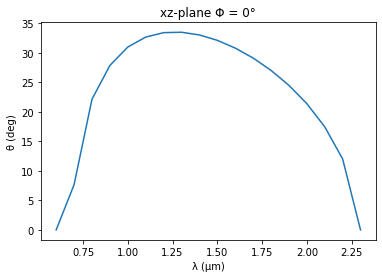

In [617]:
x = [0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3]
y = [0,7.66,22.14,27.87,30.99,32.68,33.43,33.5,33.04,32.13,30.82,29.13,27.04,24.5,21.4,17.48,12.03,0]
plt.plot(x,y)
plt.xlabel('λ (μm)')
plt.ylabel('θ (deg)')
plt.title('xz-plane Φ = 0°')
plt.show()